In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
main_data = pd.read_csv('insurancex.csv')

In [2]:
main_data.shape

(1338, 7)

In [3]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
nulls_series             = main_data.isna().sum()         # Get a series counting number of empty values for each column
nonnulls_series          = main_data.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
column_datatypes         = main_data.dtypes               # Get a series containing data types for each column 

nulls_count_df = pd.concat(
    [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
    axis=1,
    keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
    sort=True)
cm = sns.light_palette("red", as_cmap=True)

nulls_count_df

,Nulls,Non-Nulls,Nulls %,Type
age,0,1338,0.0,int64
bmi,0,1338,0.0,float64
charges,0,1338,0.0,float64
children,0,1338,0.0,int64
region,0,1338,0.0,object
sex,0,1338,0.0,object
smoker,0,1338,0.0,object


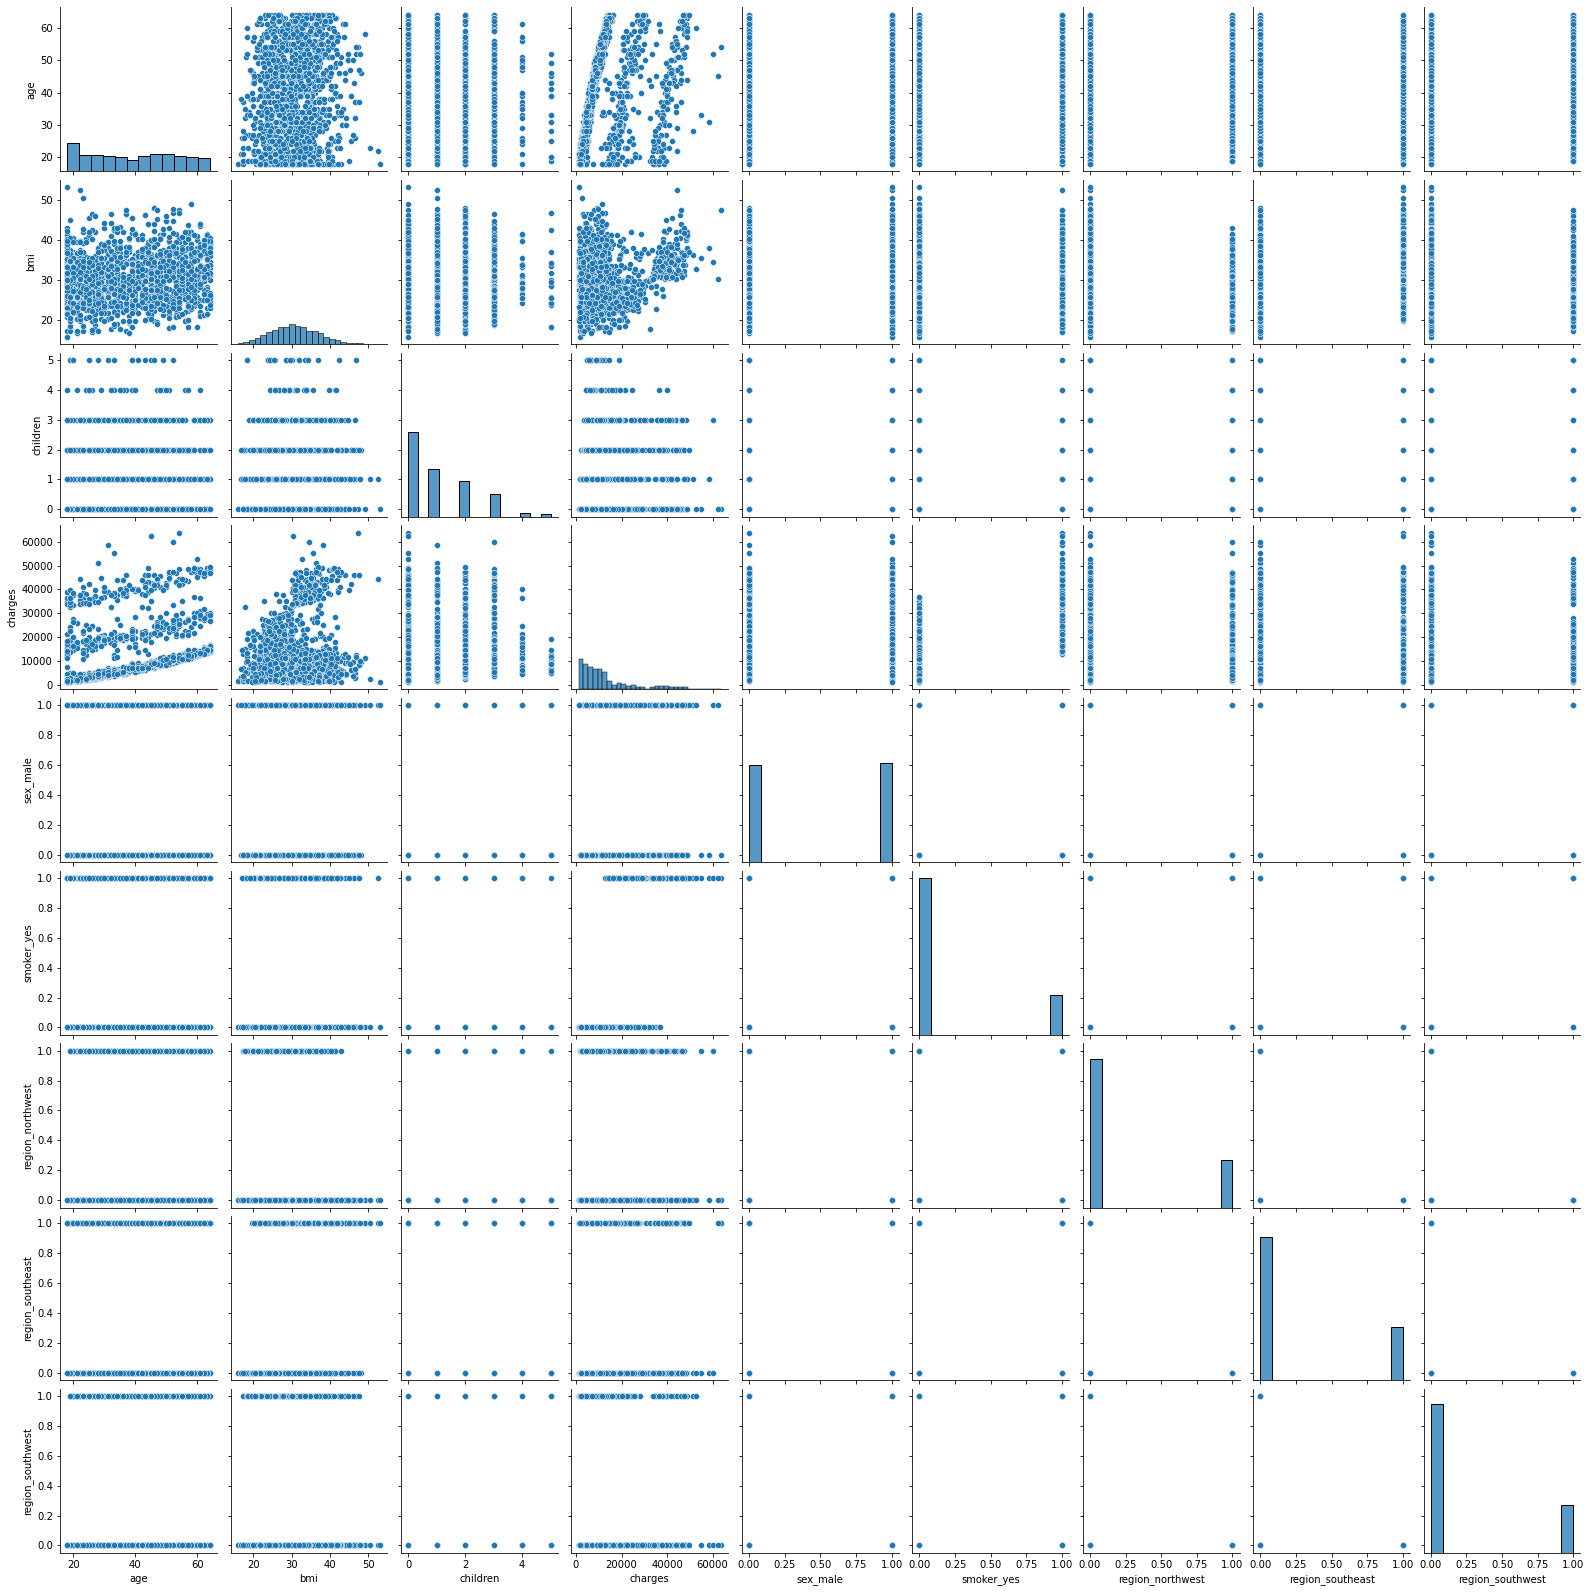

In [47]:
sns.pairplot(main_data)

In [5]:
main_data[['age', 'charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [18]:
main_data=pd.get_dummies(main_data, drop_first=True)
main_data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [19]:
np.random.seed(1)
main_data.sample(n=100)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
559,19,35.530,0,1646.42970,1,0,1,0,0
1087,57,31.540,0,11353.22760,1,0,1,0,0
1020,51,37.000,0,8798.59300,1,0,0,0,1
460,49,36.630,3,10381.47870,0,0,0,1,0
802,21,22.300,1,2103.08000,1,0,0,0,1
298,31,34.390,3,38746.35510,1,1,1,0,0
481,49,37.510,2,9304.70190,1,0,0,1,0
616,56,28.595,0,11658.11505,0,0,0,0,0
763,27,26.030,0,3070.80870,1,0,0,0,0
750,37,26.400,0,19539.24300,0,1,0,1,0


In [84]:
from sklearn.model_selection import train_test_split
X = main_data[['age']]
Y = main_data[['charges']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=1)

In [85]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, Y_train)

LinearRegression()

In [86]:
lg.score(X_train, Y_train)

0.09584104415081118

In [87]:
for idx, column_name in enumerate(X_train.columns):
    print(f"Coeff for {column_name} is {lg.coef_[0][idx]}")

Coeff for age is 285.67890374140126


In [88]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y_test, X_test, squared=False)
rms

17786.50866903845

In [83]:
main_data.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


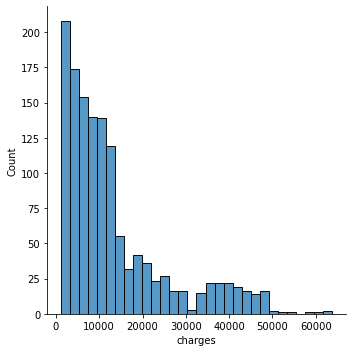

In [55]:
sns.displot(main_data['charges'])

In [56]:
nulls_series             = main_data.isna().sum()         # Get a series counting number of empty values for each column
nonnulls_series          = main_data.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
column_datatypes         = main_data.dtypes               # Get a series containing data types for each column 

nulls_count_df = pd.concat(
    [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
    axis=1,
    keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
    sort=True)
cm = sns.light_palette("red", as_cmap=True)

nulls_count_df

,Nulls,Non-Nulls,Nulls %,Type
age,0,1338,0.0,int64
bmi,0,1338,0.0,float64
charges,0,1338,0.0,float64
children,0,1338,0.0,int64
region_northwest,0,1338,0.0,uint8
region_southeast,0,1338,0.0,uint8
region_southwest,0,1338,0.0,uint8
sex_male,0,1338,0.0,uint8
smoker_yes,0,1338,0.0,uint8


In [57]:
(main_data['children'].where(main_data['children'] == 0).dropna().count() * 100 )/1338

42.89985052316891

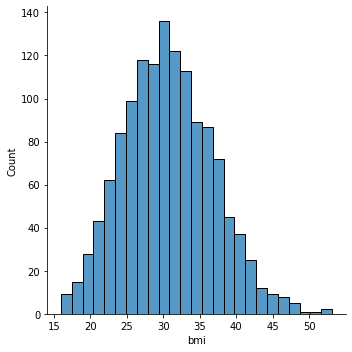

In [58]:
sns.displot(main_data['bmi'])

In [22]:
main_data['Median'] = main_data.median()
main_data

,age,sex,bmi,children,smoker,region,charges,Median
0,19,female,27.900,0,yes,southwest,16884.92400,NaN
1,18,male,33.770,1,no,southeast,1725.55230,NaN
2,28,male,33.000,3,no,southeast,4449.46200,NaN
3,33,male,22.705,0,no,northwest,21984.47061,NaN
4,32,male,28.880,0,no,northwest,3866.85520,NaN
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,NaN
1334,18,female,31.920,0,no,northeast,2205.98080,NaN
1335,18,female,36.850,0,no,southeast,1629.83350,NaN
1336,21,female,25.800,0,no,southwest,2007.94500,NaN


In [23]:
main_data[['region', 'charges']].groupby(['region']).median()

,charges
region,
northeast,10057.652025
northwest,8965.795750
southeast,9294.131950
southwest,8798.593000


In [24]:
main_data.corr()

,age,bmi,children,charges,Median
age,1.000000,0.109272,0.042469,0.299008,NaN
bmi,0.109272,1.000000,0.012759,0.198341,NaN
children,0.042469,0.012759,1.000000,0.067998,NaN
charges,0.299008,0.198341,0.067998,1.000000,NaN
Median,NaN,NaN,NaN,NaN,NaN
